In [1]:
#
#  File:
#    NUG_rectilinear_contour_PyNGL.py
#
#  Synopsis:
#    Illustrates creating contours over a map
#
#  Categories:
#    contour plots
#
#  Author:
#    Karin Meier-Fleischer
#  
#  Date of initial publication:
#    June 2015
#
#  Description:
#    This example shows how to create contours over
#    a map using rectilinear data.
#
#  Effects illustrated:
#    o  Drawing filled contours over a map
#    o  Defining contour levels based on min/max and spacing
# 
#  Output:
#    One visualization is produced.
#
#  Notes: The data for this example can be downloaded from 
#    http://www.ncl.ucar.edu/Document/Manuals/NCL_User_Guide/Data/
#     
"""
  NCL User Guide Python Example:   NUG_rectilinear_contour_PyNGL.py
   - filled contour over map plot
   - rectilinear grid (lat/lon)
   - colorbar
   
  2015-06-04  kmf
"""
from __future__ import print_function
import Ngl,Nio
import os,sys


In [4]:
#-- define variables
diri   = "./"                                  #-- data directory
fname  = "rectilinear_grid_2D.nc"              #-- data file name
ffile  = os.path.join(diri, fname)

#---Test if file exists
if(not os.path.exists(ffile)):
    print("You do not have the necessary file ({}) to run this example.".format(ffile))
    print("You can get the files from the NCL website at:")
    print("http://www.ncl.ucar.edu/Document/Manuals/NCL_User_Guide/Data/")
    sys.exit()

minval =  250.                                 #-- minimum contour level
maxval =  315                                  #-- maximum contour level
inc    =    5.                                 #-- contour level spacing

In [6]:
#-- open file and read variables
f      =  Nio.open_file(ffile, "r")            #-- open data file
temp   =  f.variables["tsurf"][0,:,:]          #-- first time step
lat    =  f.variables["lat"][:]                #-- all latitudes
lon    =  f.variables["lon"][:]                #-- all longitudes

tempac,lon =  Ngl.add_cyclic(temp,lon)

#-- open a workstation
wkres                 =  Ngl.Resources()      #-- generate an res object 
wks_type              = "png"                 #-- output type
wks_name              = " NUG_rectilinear_contour_PyNGL"
wks                   =  Ngl.open_wks(wks_type,wks_name,wkres)

#-- set resources
res                    =  Ngl.Resources()      #-- generate an resource object for plot

if hasattr(f.variables["tsurf"],"long_name") and hasattr(f.variables["tsurf"],"units"):
   res.tiMainString = "{} ({})".format(f.variables["tsurf"].long_name,
                                       f.variables["tsurf"].units)      #-- set main title

res.cnFillOn              =  True              #-- turn on contour fill.
res.cnLinesOn             =  False             #-- turn off contour lines
res.cnLineLabelsOn        =  False             #-- turn off line labels.
res.cnInfoLabelOn         =  False             #-- turn off info label.
res.cnLevelSelectionMode  = "ManualLevels"     #-- select manual level selection mode
res.cnMinLevelValF        =  minval            #-- minimum contour value
res.cnMaxLevelValF        =  maxval            #-- maximum contour value
res.cnLevelSpacingF       =  inc               #-- contour increment
res.cnFillPalette         = "rainbow"          #-- choose color map

res.mpGridSpacingF        =  30                #-- map grid spacing

res.sfXArray              =  lon               #-- longitude locations of data
res.sfYArray              =  lat               #-- latitude locations of data

res.lbOrientation         = "Horizontal"       #-- labelbar orientation

map = Ngl.contour_map(wks,tempac,res)          #-- draw contours over a map.

#-- end
Ngl.end()

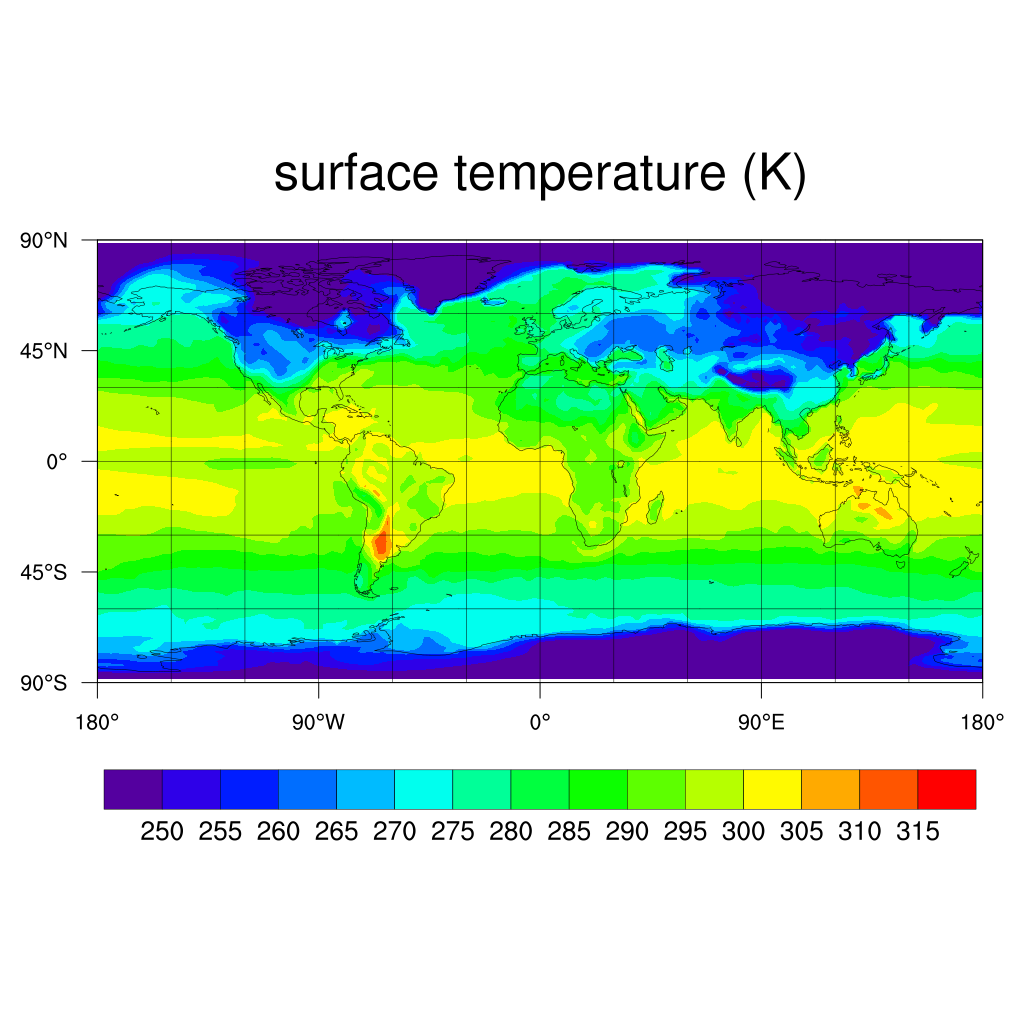